In [4]:
import numpy as np
import sys
import datetime

def inside_circle(total_count):
    x = np.random.uniform(size=total_count)
    y = np.random.uniform(size=total_count)
    radii = np.sqrt(x*x + y*y)
    count = len(radii[np.where(radii<=1.0)])
    return count


n_samples = 100
start_time = datetime.datetime.now()
counts = inside_circle(n_samples)
my_pi = 4.0 * counts / n_samples
end_time = datetime.datetime.now()
elapsed_time = (end_time - start_time).total_seconds()
size_of_float = np.dtype(np.float64).itemsize
memory_required = 3 * n_samples * size_of_float / (1024**3)
print("Pi: {}, memory: {} GiB, time: {} s".format(my_pi, memory_required, elapsed_time))

Pi: 2.8, memory: 2.2351741790771484e-06 GiB, time: 0.026 s


In [19]:
import numpy as np
import csv
import sys
import datetime
import numpy as np
import math

def inside_circle(total_count):
    x = np.random.uniform(size=total_count)
    y = np.random.uniform(size=total_count)
    radii = np.sqrt(x*x + y*y)
    count = len(radii[np.where(radii<=1.0)])
    return count
results=[]
with open("pi_results.csv", "w", newline="") as file:
    writer = csv.writer(file)
    for i in range(9):
        start_time = datetime.datetime.now()
        counts = inside_circle(n_samples)
        n_samples = 10**i
        my_pi = 4.0 * counts / n_samples
        end_time = datetime.datetime.now()
        elapsed_time = (end_time - start_time).total_seconds()
        size_of_float = np.dtype(np.float64).itemsize
        memory_required = 3 * n_samples * size_of_float / (1024**3)
        absErr = my_pi - math.pi
        relErr = (absErr / math.pi) * 100
        results = [my_pi, memory_required, elapsed_time, absErr, relErr, 10**i]
        writer.writerow(results)


    

In [20]:
with open("pi_results.csv", "r") as file:
    for row in file:
        print(row)

314159924.0,2.2351741790771484e-08,2.661,314159920.8584073,10000020865.194832,1

0.4,2.2351741790771484e-07,0.001,-2.741592653589793,-87.26760455264836,10

0.32,2.2351741790771484e-06,0.0,-2.8215926535897933,-89.8140836421187,100

0.324,2.2351741790771484e-05,0.0,-2.8175926535897933,-89.68675968764519,1000

0.314,0.00022351741790771484,0.0,-2.827592653589793,-90.00506957382896,10000

0.31188,0.0022351741790771484,0.0,-2.829712653589793,-90.07255126969994,100000

0.314608,0.022351741790771484,0.003,-2.8269846535897933,-89.985716332749,1000000

0.3141864,0.22351741790771484,0.026,-2.827406253589793,-89.9991362775505,10000000

0.31418476,2.2351741790771484,0.263,-2.8274078935897933,-89.99918848037186,100000000



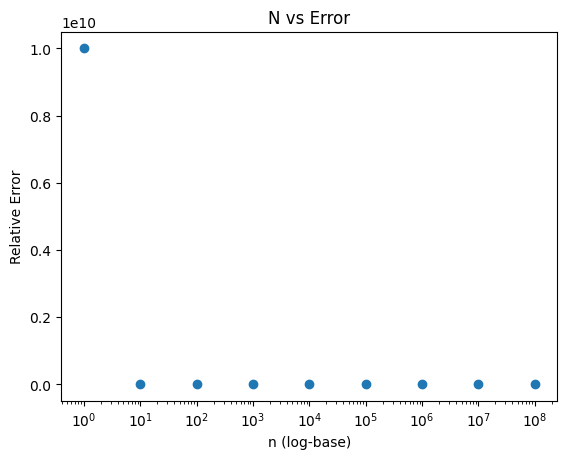

[10000020865.194832, -87.26760455264836, -89.8140836421187, -89.68675968764519, -90.00506957382896, -90.07255126969994, -89.985716332749, -89.9991362775505, -89.99918848037186]


In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

memory = []
time = []
absErr = []
relErr = []
iterationCount = []
df = pd.read_csv("pi_results.csv", header=None)
pi_estimate = df[0].tolist()
memory = df[1].tolist()
time = df[2].tolist()
absErr = df[3].tolist()
relErr = df[4].tolist()
iterationCount = df[5].tolist()

plt.xscale("log")
plt.title("N vs Error")

plt.xlabel("n (log-base)")
plt.ylabel("Relative Error")
plt.scatter(iterationCount, relErr)

plt.show()
print(relErr)

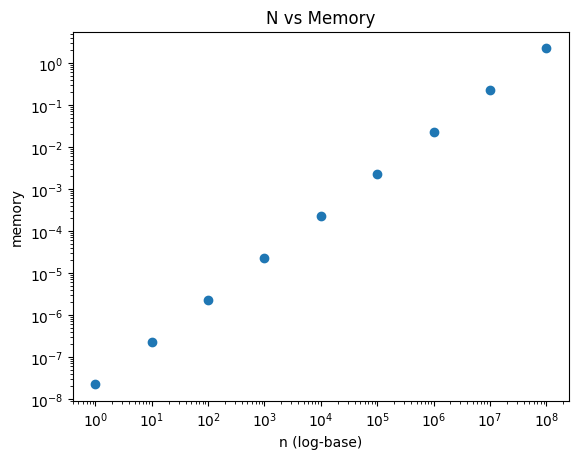

[10000020865.194832, -87.26760455264836, -89.8140836421187, -89.68675968764519, -90.00506957382896, -90.07255126969994, -89.985716332749, -89.9991362775505, -89.99918848037186]


In [33]:
plt.xscale("log")
plt.yscale("log")
plt.title("N vs Memory")

plt.xlabel("n (log-base)")
plt.ylabel("memory")
plt.scatter(iterationCount, memory)

plt.show()
print(relErr)

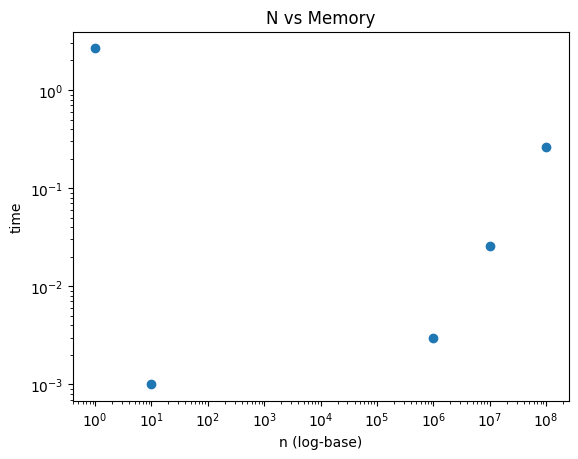

In [34]:
plt.xscale("log")
plt.yscale("log")
plt.title("N vs Memory")

plt.xlabel("n (log-base)")
plt.ylabel("time")
plt.scatter(iterationCount, time)

plt.show()